# 課題2：住宅価格の回帰モデルの作成

本課題では課題1と同じデータを用いてデータ分析の流れを確認します。各セルに入っているコメントの下に、実行するコードを記入してください。わからない場合は、ここまでのレッスン内容や各種ライブラリの公式ドキュメントを参照しましょう。

## 1. 必要なライブラリの読み込み

In [1]:
# 必要なライブラリの読み込み（変更しないでください）
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## 2. データの読み込み

CSVファイル *iowa_ames_housing_price.csv* を読み込み、内容を確認します。

In [3]:
# データを変数datasetに読み込む
pd.options.display.max_columns = None
dataset = pd.read_csv("./iowa_ames_housing_price.csv")


In [4]:
# データの最初の5行を表示
dataset.head()


,Order,area,price,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,X1stFlrSF,X2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,1710,208500,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,1262,181500,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,1786,223500,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,1717,140000,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,2198,250000,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [7]:
dataset.shape

(1460, 81)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order          1460 non-null   int64  
 1   area           1460 non-null   int64  
 2   price          1460 non-null   int64  
 3   MSSubClass     1460 non-null   int64  
 4   MSZoning       1460 non-null   object 
 5   LotFrontage    1201 non-null   float64
 6   LotArea        1460 non-null   int64  
 7   Street         1460 non-null   object 
 8   Alley          91 non-null     object 
 9   LotShape       1460 non-null   object 
 10  LandContour    1460 non-null   object 
 11  Utilities      1460 non-null   object 
 12  LotConfig      1460 non-null   object 
 13  LandSlope      1460 non-null   object 
 14  Neighborhood   1460 non-null   object 
 15  Condition1     1460 non-null   object 
 16  Condition2     1460 non-null   object 
 17  BldgType       1460 non-null   object 
 18  HouseSty

## 3. 目的変数と説明変数の選択

ここでは、以下の列を使用します。

- 目的変数： `price`
- 説明変数： `OverallQual`, `area`, `X2ndFlrSF`, `BsmtFinSF1`,  `OverallCond`

In [5]:
# 目的変数の列名（変更しないでください）
target_col = 'price'

# 説明変数の列名（変更しないでください）
feature_cols = ['OverallQual', 'area', 'X2ndFlrSF', 'BsmtFinSF1', 'OverallCond']

In [13]:
# target_col と feature_cols を使用して dataset より目的変数と説明変数に該当する列を取得し、
# numpy 配列に変換したものを変数 Y と X に格納する



# Y:目的変数に該当する列
Y = np.array(dataset[target_col])


# X:説明変数に該当する列
X = np.array(dataset[feature_cols])


In [14]:
print("Y=", Y.shape, ", X=", X.shape)

Y= (1460,) , X= (1460, 5)


## 4. データの分割

この課題では、ホールドアウト法でデータを分割します。

In [15]:
# X と Y を 機械学習用データとテストデータに7:3で分ける(X_train, X_test, Y_train, Y_test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)



In [16]:
# 機械学習用データを、学習データと検証データに7:3で分ける(X_train, X_valid, Y_train, Y_valid)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)

## 5. モデルの作成から評価まで

線形回帰モデルと、回帰木、ランダムフォレストの3つのモデルを作成して比較します。それぞれのモデルで以下を行います。
- モデルの作成
- 学習データによる学習
- 検証データによる予測
- MSEの算出

In [19]:
# 線形回帰モデルを作成し、学習・予測を実施して、MSEを算出する
liner_model = LinearRegression()

liner_model.fit(X_train,Y_train)

Y_pred = liner_model.predict(X_valid)

#print(Y_valid[:5])
#print(Y_pred[:5])
liner_model_mse = mean_squared_error(Y_valid,Y_pred)
print('MSE(1変数の線形回帰モデル):', liner_model_mse)



MSE(1変数の線形回帰モデル): 1670916761.2011995


In [20]:
# 回帰木のモデルを作成し、学習・予測を実施して、MSEを算出する
tree_model = DecisionTreeRegressor()

tree_model.fit(X_train,Y_train)

Y_pred = tree_model.predict(X_valid)

tree_model_mse = mean_squared_error(Y_valid,Y_pred)
print('MSE(回帰木):', tree_model_mse)

MSE(回帰木): 2357536259.1824102


In [22]:
# ランダムフォレストのモデルを作成し、学習・予測を実施して、MSEを算出する

randomforest_model = RandomForestRegressor(n_estimators=10, random_state=0)

randomforest_model.fit(X_train,Y_train)

Y_pred = randomforest_model.predict(X_valid)

randomforest_model_mse = mean_squared_error(Y_valid,Y_pred)
print('MSE(ランダムフォレスト):', randomforest_model_mse)




MSE(ランダムフォレスト): 1784879819.4065275


In [ ]:
"""
LI:1670916761.2011995
TR:2357536259.1824102
RM:1784879819.4065275

MSEの値が一番小さいのは線形回帰モデル

"""

## 6. テストデータによる汎化性能の確認

3つの中でもっともMSEの値が良かったモデルについて、テストデータで汎化性能を確認しましょう。

In [23]:
# テストデータを使って予測を行いMSEを算出
Y_pred_test = liner_model.predict(X_test)
liner_model_mse_test = mean_squared_error(Y_test,Y_pred_test)
print('MSE(1変数の線形回帰モデル)_テストデータ:', liner_model_mse_test)




MSE(1変数の線形回帰モデル)_テストデータ: 2309649258.544849


## 7. グラフによる確認

説明変数が多い場合、「説明変数で目的変数を正しく予測できているか」を可視化することは困難です。そこで「正解と予測値」とを比較することで、予測の精度を可視化してみましょう。

### 散布図による可視化

X軸(横方向)に `テストデータの正解の値` 、Y軸(縦方向)に `予測値` を使って散布図を作成してみましょう。全体的に右肩上がりで、直線上にデータが並んでいれば、予測が行なえていると判断できます。

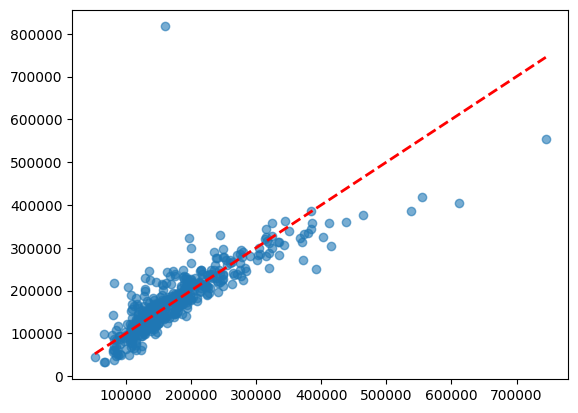

In [37]:
# X軸:正解の値、Y軸:予測値で散布図を作成
plt.scatter(Y_test, Y_pred_test, alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()],
         [Y_test.min(), Y_test.max()],
         'r--', lw=2)
plt.show()

In [34]:
from sklearn.metrics import r2_score
print("R^2:", r2_score(Y_test, Y_pred_test))

R^2: 0.6597949373438587


### ヒストグラムによる可視化

「誤差率＝正解の値と予測値との差の割合」をヒストグラムで確認してみましょう。誤差率は以下で計算できます。

`（正解の値－予測値）/ 正解の値`

併せて、誤差率の平均値、標準偏差も出力しましょう。平均値は `numpy` の `mean` 関数、標準偏差は `std` 関数で取得できます。

なお、ヒストグラムを描く際は`matplotlib.pyplot`の`hist`関数が使えます。matplotlib.pyplotはpltという名前をつけているはずなので、ヒストグラム化したいデータを`plt.hist()`の引数に渡すことでヒストグラムを描画できます。

誤差率の平均値(%)：-1.64
誤差率の標準偏差(%)：0.298


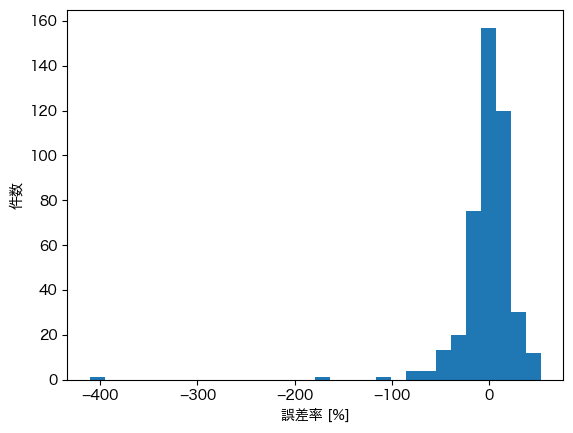

In [66]:
# 実際の成約価格と予測価格の誤差率をヒストグラムで表示
# 誤差率計算
err = (Y_test-Y_pred_test)/Y_test

# %表示にする
err_pct = err * 100.0

# ヒストグラム表示
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Hiragino Sans' 
plt.hist(err_pct, bins=30)
plt.xlabel("誤差率 [%]")
plt.ylabel("件数")

# 平均値
mean = np.mean(err_pct)
print(f"誤差率の平均値(%)：{mean:.3}")

# 標準偏差
std = np.std(err)
print(f"誤差率の標準偏差(%)：{std:.3}")
